In [1]:
import cPickle as pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
import glob
import itertools
import cPickle as pickle

In [4]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
from util import Util
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [5]:
RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/CROSSNETWORK/'

In [18]:
experiments = ['C.Figure1.position_common_scale', \
               'C.Figure1.position_non_aligned_scale', \
               'C.Figure1.length', \
               'C.Figure1.direction', \
               'C.Figure1.angle', \
               'C.Figure1.area', \
               'C.Figure1.volume', \
               'C.Figure1.curvature', \
               'C.Figure1.shading']

all_labels = {'C.Figure1.position_common_scale': ['Position Y', '+ Position X', '+ Spotsize'], \
              'C.Figure1.position_non_aligned_scale': ['Position Y', '+ Position X', '+ Spotsize'],\
              'C.Figure1.length': ['Length', '+ Position Y', '+ Position X', '+ Width'], \
              'C.Figure1.direction': ['Direction', '+ Position Y', '+ Position X'], \
              'C.Figure1.angle': ['Angle', '+ Position Y', '+ Position X'], \
              'C.Figure1.area': ['Area', '+ Position Y', '+ Position X'], \
              'C.Figure1.volume': ['Volume', '+ Position Y', '+ Position X'], \
              'C.Figure1.curvature': ['Curvature', '+ Position Y', '+ Position X'], \
              'C.Figure1.shading': ['Shading', '+ Position Y', '+ Position X']
              }

presets = {
 'C.Figure1.position_common_scale': 40, \
 'C.Figure1.position_non_aligned_scale': 10, \
 'C.Figure1.length': 35, \
 'C.Figure1.direction': 215, \
 'C.Figure1.angle': 60, \
 'C.Figure1.area': 20, \
 'C.Figure1.volume': 18, \
 'C.Figure1.curvature': 50, \
 'C.Figure1.shading': 80
}

In [7]:
RUNS = 4
CLASSIFIERS = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']

for e in experiments:
    all_files = os.listdir(RESULTS_DIR+e)
    
    if len(all_files) != RUNS * len(CLASSIFIERS):
        
        for c in CLASSIFIERS:
            
            missing = []
            for r in range(1,RUNS+1):
            
                file_req = RESULTS_DIR+e+'/'+c+'_'+str(r)+'.p'
#                 print file_req
                if not os.path.exists(file_req):
                    missing.append(r)
            if len(missing) > 0:
                print 'sbatch ' + e+'_'+c+'.sbatch', missing

In [8]:
RUNS = 4
CLASSIFIERS = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']

outputs = []

for e in experiments:
    
    e_stats = []
    
    for c in CLASSIFIERS:

        c_stats = None
        
        anything_missing = False
        
        for r in range(1,RUNS+1):

            file_req = RESULTS_DIR+e+'/'+c+'_'+str(r)+'.p'
#                 print file_req
            if not os.path.exists(file_req):
#                 print 'missing', file_req
                anything_missing = True
                continue

            # load pickle
            with open(file_req, 'r') as f:
                current_stats = pickle.load(f)

            if r == 1:
                c_stats = np.array(current_stats)
            else:
                # add them up
                c_stats += np.array(current_stats)
                
        if not anything_missing:

            c_stats /= RUNS
            # now this is the average stats for this classifier for this experiment

        else:
            
            # we will skip this one
            c_stats = []
            
        e_stats.append(c_stats)
                
        print 'Loaded', e, c
            
    outputs.append(e_stats)

Loaded C.Figure1.position_common_scale MLP
Loaded C.Figure1.position_common_scale LeNet
Loaded C.Figure1.position_common_scale VGG19
Loaded C.Figure1.position_common_scale XCEPTION
Loaded C.Figure1.position_non_aligned_scale MLP
Loaded C.Figure1.position_non_aligned_scale LeNet
Loaded C.Figure1.position_non_aligned_scale VGG19
Loaded C.Figure1.position_non_aligned_scale XCEPTION
Loaded C.Figure1.length MLP
Loaded C.Figure1.length LeNet
Loaded C.Figure1.length VGG19
Loaded C.Figure1.length XCEPTION
Loaded C.Figure1.direction MLP
Loaded C.Figure1.direction LeNet
Loaded C.Figure1.direction VGG19
Loaded C.Figure1.direction XCEPTION
Loaded C.Figure1.angle MLP
Loaded C.Figure1.angle LeNet
Loaded C.Figure1.angle VGG19
Loaded C.Figure1.angle XCEPTION
Loaded C.Figure1.area MLP
Loaded C.Figure1.area LeNet
Loaded C.Figure1.area VGG19
Loaded C.Figure1.area XCEPTION
Loaded C.Figure1.volume MLP
Loaded C.Figure1.volume LeNet
Loaded C.Figure1.volume VGG19
Loaded C.Figure1.volume XCEPTION
Loaded C.Figu

In [111]:
len(outputs)

9

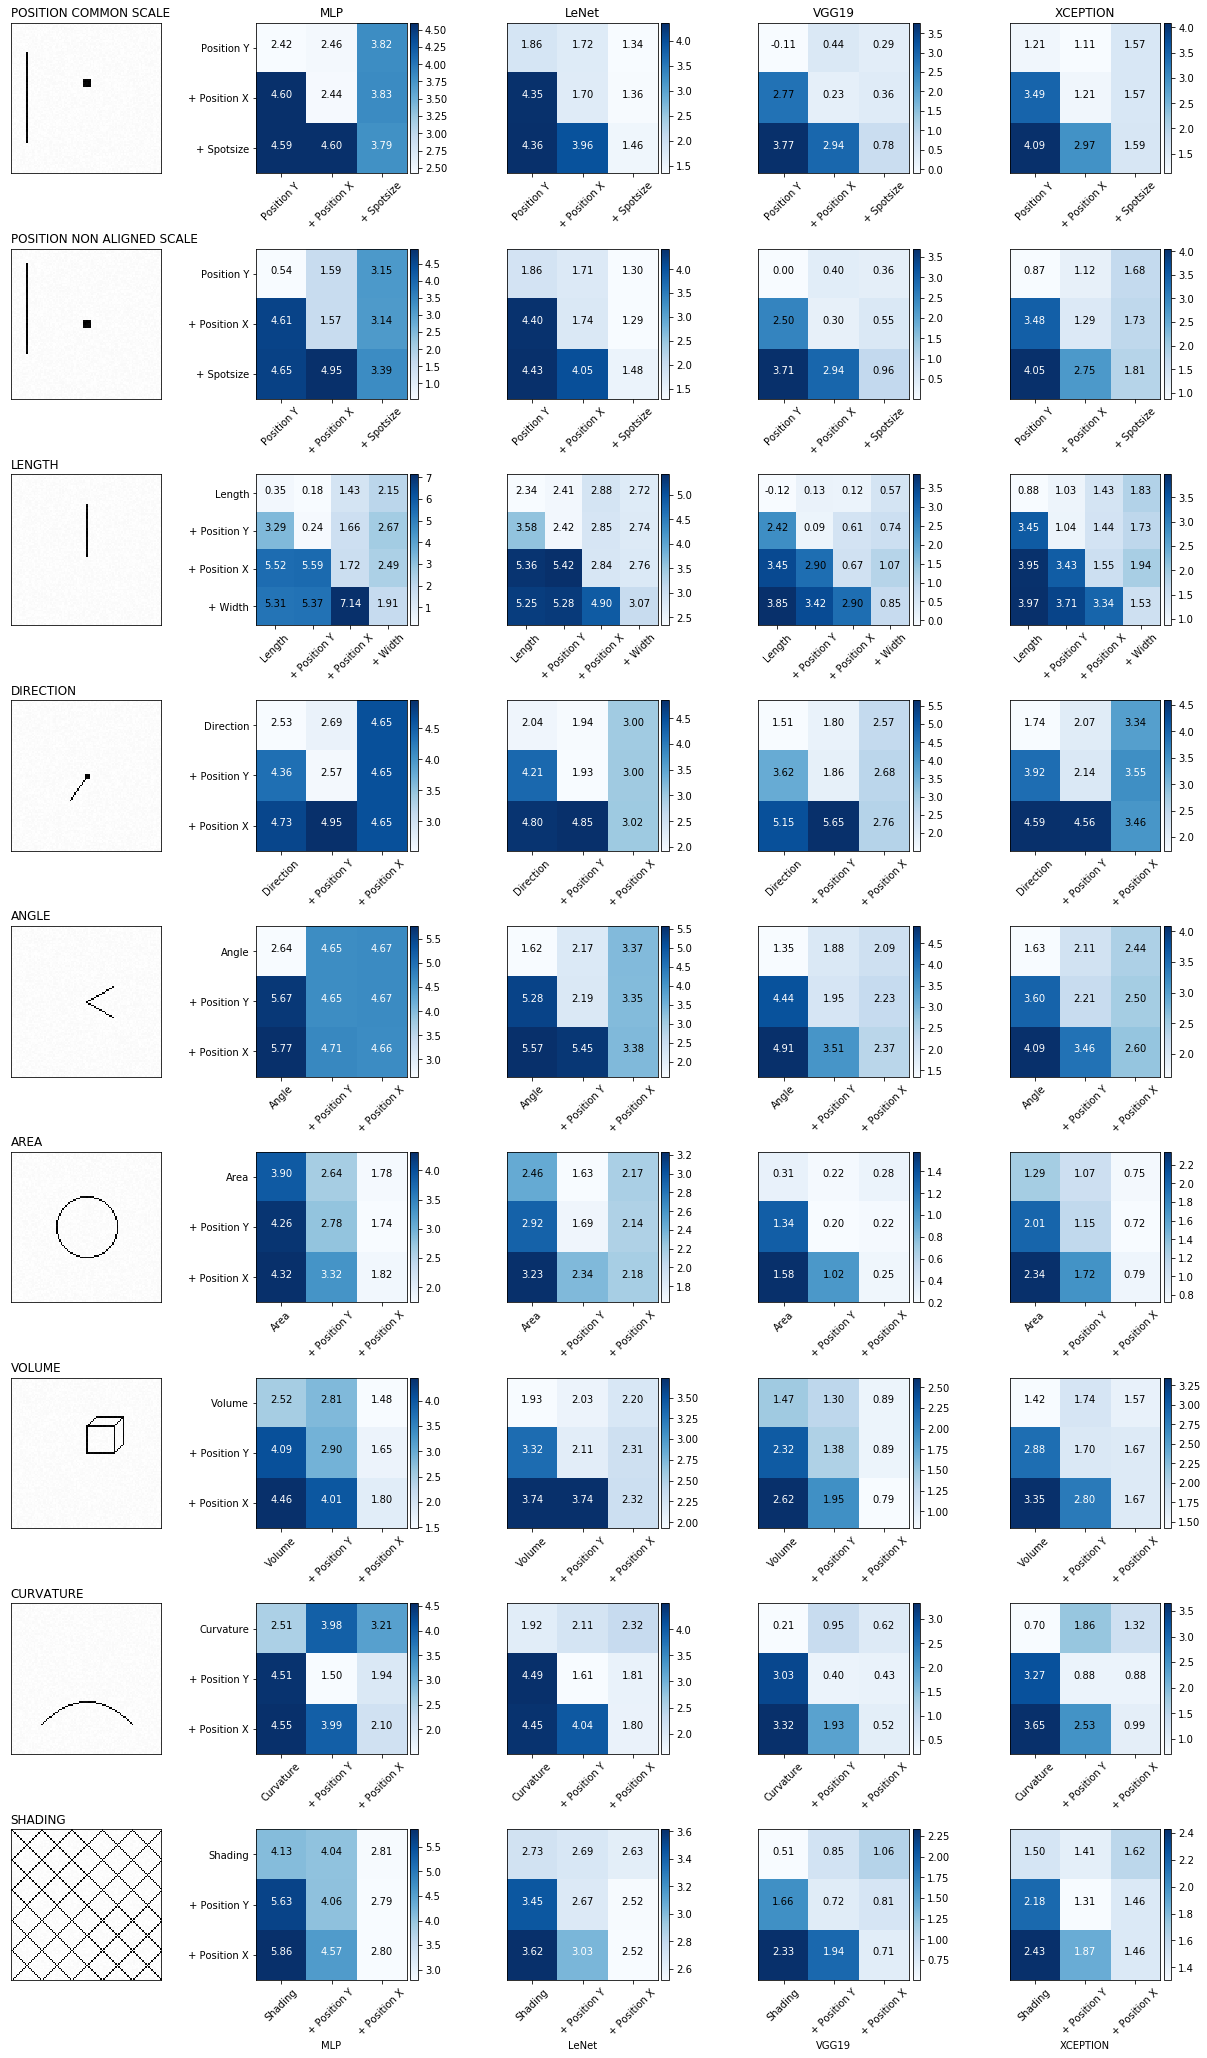

In [30]:
def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax)

def plot_cross_network(cm, classes, cmap=plt.cm.Blues, c_name='', e_name='', last_row=False, first_col=False):

    img = plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title, loc='left')
#     plt.colorbar()
#     colorbar(img)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    ax = plt.gca()

    fmt = '.2f'
    thresh = cm.max() / 1.3
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
    if first_col:
#         plt.ylabel('')
        ax.get_yaxis().set_ticks(range(len(classes))) # we set the labels here
        ax.get_yaxis().set_ticklabels(classes)
    else:
        ax.get_yaxis().set_ticks([])
    if last_row:
        plt.xlabel(c_name)
        
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img, cax=cax)
    
#     plt.savefig('../PAPER/SUPPLEMENTAL/gfx/cn_'+str(e_name)+'_'+str(c_name)+'_average.pdf', bbox_inches='tight', pad_inches=0)
    
from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib import gridspec
fig = plt.figure(figsize=(21,len(experiments)*4), facecolor='white')
gs = gridspec.GridSpec(len(experiments), 5, width_ratios=[1,1,1,1,1], wspace=.5, hspace=.5)
    
    
z = 0
for i,e in enumerate(experiments):

    for j,c in enumerate(['Image'] + CLASSIFIERS):
    
        
        fig = plt.subplot(gs[z])
        z += 1
        

        if j == 0:
            
            plt.title(e.split('.')[-1].replace('_',' ').upper(), loc='left')
            
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
            plt.tight_layout()

            image = eval(e)(preset=presets[e])[1]
            image = image.astype(np.float32)
            image += np.random.uniform(0, 0.05,(100,100))
            
            ax.set_xticklabels('')
            ax.set_yticklabels('')
            ax.set_xticks(np.arange(-.5, 100, 10), minor=False);
            ax.set_yticks(np.arange(-.5, 100, 10), minor=False);
        #     ax.grid(which='major', color='gray', linestyle=':', linewidth='0.5')
            ax.set_axisbelow(True)

            plt.imshow(image, cmap='Greys', interpolation='none')
            continue


        results = outputs[i][j-1]
            
        if z <= len(CLASSIFIERS)+1:
            plt.title(c)
            
        
        if len(results) == 0:
#             print 'missing', e, c
            plt.axis('off')
            continue
    
#         if j == 0:
#             current_title = e.upper().split('.')[-1].replace('_', ' ')
#         else:
#             current_title = ''
            
        
#         if i != 1:
            
#         else:
# #             print labels
#             ax.get_yaxis().set_ticks(range(len(labels))) # we set the labels here
#             ax.get_yaxis().set_ticklabels(labels)
        
    
        # trim data
        if e=='C.Figure1.position_non_aligned_scale':
            results = results[1:,1:]
        elif e=='C.Figure1.curvature':
            results = results[:-1, :-1]
    
        plot_cross_network(results, classes=all_labels[e],
                              c_name=c, e_name=e, last_row=(i==8), first_col=(j==1))

        
plt.savefig('../PAPER/SUPPLEMENTAL/gfx/cross_network.pdf', bbox_inches='tight', pad_inches=0)

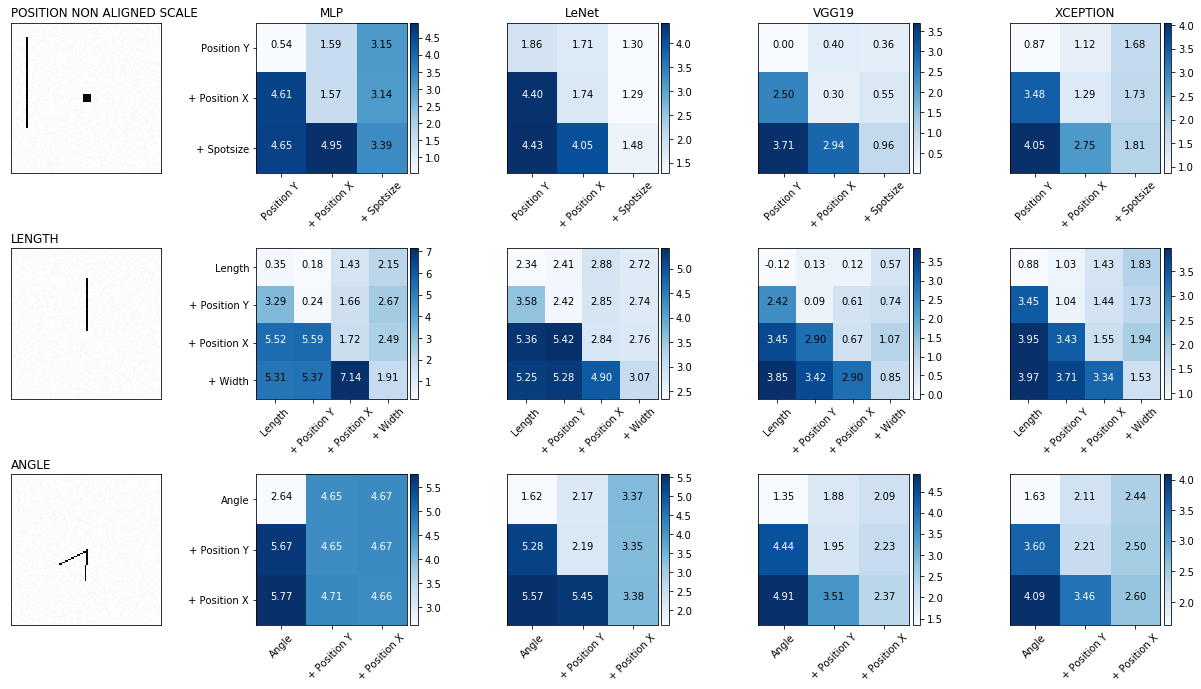

In [32]:
def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax)

def plot_cross_network(cm, classes, cmap=plt.cm.Blues, c_name='', e_name='', last_row=False, first_col=False):

    img = plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title, loc='left')
#     plt.colorbar()
#     colorbar(img)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    ax = plt.gca()

    fmt = '.2f'
    thresh = cm.max() / 1.3
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
    if first_col:
#         plt.ylabel('')
        ax.get_yaxis().set_ticks(range(len(classes))) # we set the labels here
        ax.get_yaxis().set_ticklabels(classes)
    else:
        ax.get_yaxis().set_ticks([])
    if last_row:
        plt.xlabel(c_name)
        
    # from http://joseph-long.com/writing/colorbars/
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img, cax=cax)
    
#     plt.savefig('../PAPER/SUPPLEMENTAL/gfx/cn_'+str(e_name)+'_'+str(c_name)+'_average.pdf', bbox_inches='tight', pad_inches=0)
    
from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib import gridspec
fig = plt.figure(figsize=(21,len(experiments)*4), facecolor='white')
gs = gridspec.GridSpec(len(experiments), 5, width_ratios=[1,1,1,1,1], wspace=.5, hspace=.5)
    
    
z = 0
for i,e in enumerate(experiments):

    if e not in ['C.Figure1.position_non_aligned_scale', 'C.Figure1.length', 'C.Figure1.angle']:
        continue
    
    for j,c in enumerate(['Image'] + CLASSIFIERS):
    
        
        fig = plt.subplot(gs[z])
        z += 1
        

        if j == 0:
            
            plt.title(e.split('.')[-1].replace('_',' ').upper(), loc='left')
            
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
            plt.tight_layout()

            image = eval(e)(preset=presets[e])[1]
            image = image.astype(np.float32)
            image += np.random.uniform(0, 0.05,(100,100))
            
            ax.set_xticklabels('')
            ax.set_yticklabels('')
            ax.set_xticks(np.arange(-.5, 100, 10), minor=False);
            ax.set_yticks(np.arange(-.5, 100, 10), minor=False);
        #     ax.grid(which='major', color='gray', linestyle=':', linewidth='0.5')
            ax.set_axisbelow(True)

            plt.imshow(image, cmap='Greys', interpolation='none')
            continue


        results = outputs[i][j-1]
            
        if z <= len(CLASSIFIERS)+1:
            plt.title(c)
            
        
        if len(results) == 0:
#             print 'missing', e, c
            plt.axis('off')
            continue
    
#         if j == 0:
#             current_title = e.upper().split('.')[-1].replace('_', ' ')
#         else:
#             current_title = ''
            
        
#         if i != 1:
            
#         else:
# #             print labels
#             ax.get_yaxis().set_ticks(range(len(labels))) # we set the labels here
#             ax.get_yaxis().set_ticklabels(labels)
        
    
        # trim data
        if e=='C.Figure1.position_non_aligned_scale':
            results = results[1:,1:]
        elif e=='C.Figure1.curvature':
            results = results[:-1, :-1]
    
        plot_cross_network(results, classes=all_labels[e],
                              c_name=c, e_name=e, last_row=(i==8), first_col=(j==1))

        
plt.savefig('../PAPER/gfx/cross_network_small.pdf', bbox_inches='tight', pad_inches=0)

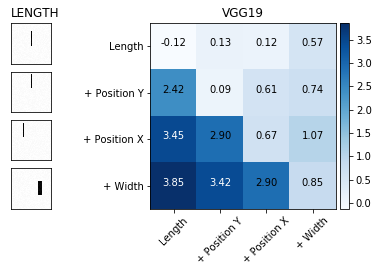

In [182]:
fig = plt.gcf()

gs1 = gridspec.GridSpec(4, 1)

for ii,ss in enumerate(gs1):
    
    flags = [False,False,False,False]
    for i in range(ii):
        flags[i] = True
        

    
    ax = fig.add_subplot(ss)
    
    if ii==0:
        ax.set_title(e.split('.')[-1].replace('_',' ').upper(), loc='left')

    
    from matplotlib.ticker import NullFormatter
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_ticks_position('none') 
#     plt.tight_layout()

    image = eval('C.Figure1.length')(flags, preset=presets['C.Figure1.length'])[1]
    image = image.astype(np.float32)
    image += np.random.uniform(0, 0.05,(100,100))
    plt.imshow(image, cmap='Greys', interpolation='none')


gs2 = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs2[0])
ax.set_title('VGG19')
e = 'C.Figure1.length'
results = outputs[2][2]
plot_cross_network(results, classes=all_labels[e],
                      c_name='VGG19', e_name=e, last_row=False, first_col=True)
    
gs2.tight_layout(fig, rect=[0.7, 0, 1.3, 1])#, h_pad=0.5)

top = min(gs1.top, gs2.top)
bottom = max(gs1.bottom, gs2.bottom)

gs1.update(top=top, bottom=bottom)
gs2.update(top=top, bottom=bottom)


top = min(gs1.top, gs2.top)
bottom = max(gs1.bottom, gs2.bottom)

plt.savefig('../PAPER/gfx/cross_network_small_VGG19.pdf')#, bbox_inches='tight', pad_inches=0)
